In [56]:
# %load include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from jax import jacfwd,grad
import jax.numpy as jnp
import json

# 1. a.)

0	0	3.082440696949098e-126
0	1	2.0842828425817514e-52
1	0	2.0842828425817514e-52
1	1	1.0


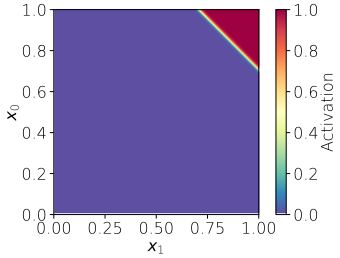

In [57]:
def feed_forward(a0,w,b):
    num_layers = len(w)
    a = a0
    for ℓ in range(num_layers):
        z = np.dot(a,w[ℓ]) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

N = [2,1]

w0 = 170.0
w1 = w0
b0 = -1.7 * w0

w = [np.array([[w0], [w1]])]
b = [np.array([b0])]

for x0 in range(2):
    for x1 in range(2):
        x = np.array([x0, x1])
        a1 = feed_forward(x, w, b)
        print(x0, x1, a1[0], sep = '\t')

grid_size = 200

x = np.meshgrid(np.linspace(0,1.0,grid_size),np.linspace(0,1.0,grid_size))
xflat = [x[0].flatten(),x[1].flatten()]

batch_size = grid_size**2
a0 = np.zeros([batch_size,2])

a0[:,0]=xflat[0]
a0[:,1]=xflat[1]
a1 = feed_forward(a0,w,b)
a1 = a1.reshape(grid_size,grid_size)

plt.imshow(a1, extent=[0,1.0,0,1.0], cmap='Spectral_r', rasterized=True, interpolation='lanczos', origin='lower')
plt.colorbar(label='Activation')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

# 1. b.)

We were not able to solve this problem,
but we did have some thoughts on it.

The XOR function decomposes in the form A*B-bar + A-bar*B.
So take inputs x_0 and x_1 and pass them into hidden layer
composed of neurons x_0, x_1, x_0-bar, x_1-bar.

Making b = -.5*w_0 in the AND gate creates an OR gate.
NOT gate can be created similarly.

Pass first hidden layer into layer of two AND gates
and then into layer of single OR gate.

This creates a XOR gate.

# 2

Answer to problem 2 is given in picture uploaded in A02 file.

# 3 a.)

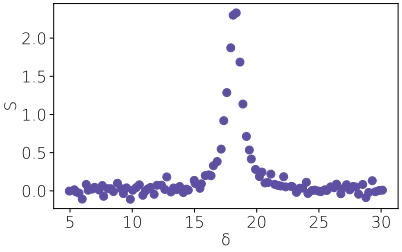

In [58]:
x,y = np.loadtxt("C60_nmr.dat", unpack = True)

plt.plot(x,y, 'o')
plt.xlabel('δ')
plt.ylabel('S');

# 3. b.)

In [81]:
def S(w,δ):
    return 1 / ( (δ - w[0])**2 + w[1] )

def Cost(w,x,y):
    return 0.5 * jnp.average( (S(w,x) - y)**2 )


w = jnp.array([18,.4], dtype = float)
v = jnp.array([0.,0.], dtype = float)
 

η = 0.5
γ = 0.3
num_iter = 50

for i in range(num_iter):
    v = γ * v + η * grad(Cost)(w,x,y)
    w -= v

results = {"alpha": float(w[0]),
           "beta": float(w[1]),
           "num_iter": num_iter,
           "eta": float(η)}

print(results)

with open("C60_optimal.json", "w") as outfile:
    json.dump(results, outfile, indent=1)

{'alpha': 18.229747772216797, 'beta': 0.4190619885921478, 'num_iter': 50, 'eta': 0.5}


# 3. c.)

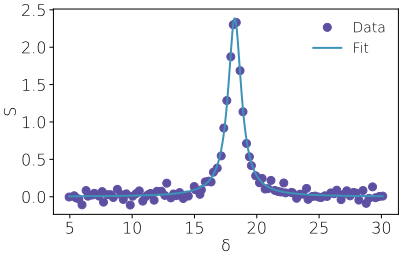

In [74]:
x_fit,y_fit = [],[]
x_fit = np.linspace(np.min(x),np.max(x),1000)
y_fit = S(w,x_fit)

plt.plot(x,y,'o',label="Data") 
plt.plot(x_fit,y_fit,'-',label="Fit")
plt.xlabel('δ')
plt.ylabel('S')
plt.legend()

# 3. d.)

{'alpha': 18.229747772216797, 'beta': 0.4190619885921478, 'num_iter': 1000, 'eta': 0.2, 'alpha_fm': 18.332393646240234, 'beta_fm': 0.3622641861438751}


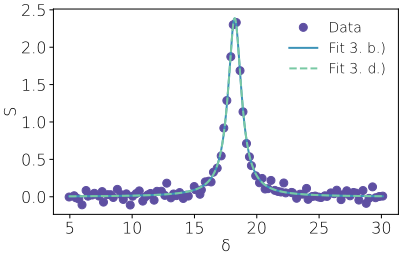

In [90]:
def S_fm(w,x):
    return 1 / S(w,x)

def Cost_fm(w,x,y):
    return 0.5 * jnp.average( (S_fm(w,x) - y)**2 )

y_fm = 1 / y[45:55]
x_fm = x[45:55]
w_fm = jnp.array([18.0,4.0])

η = 0.3
γ = 0.0
num_iter = 500
v = 0

for i in range(num_iter):
    w_fm -=  η * jacfwd(Cost_fm)(w_fm,x_fm,y_fm)

x_fit,y_fit = [],[]
x_fit = np.linspace(np.min(x),np.max(x),1000)
y_fit = S(w,x_fit)
y_fit2 = S(w_fm,x_fit)

plt.plot(x,y,'o',label="Data") 
plt.plot(x_fit,y_fit,'-',label="Fit 3. b.)")
plt.plot(x_fit,y_fit,'--',label="Fit 3. d.)")
plt.xlabel('δ')
plt.ylabel('S')
plt.legend();

results['alpha_fm'] = float(w_fm[0])
results['beta_fm'] = float(w_fm[1])

print(results)

with open("C60_optimal.json", "w") as json_file:
    json.dump(results, json_file, indent=1)